In [56]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import oledpy.dipole_emission as diem
from oledpy.dipole_emission import ThinFilmArchitecture
from numpy.lib.scimath import sqrt as csqrt
import warnings
warnings.filterwarnings('ignore')
df_nk=pd.read_csv(os.path.join('Reference Data','nk_library.csv'))

When I changed the imaginary part k of MAPbI3 refractive index from 0 to 1, no change was found in outcoupling efficiency. 

k represents the absorbing ability of materials. First, we assume the dipole is near the Al electrode, which means light will across a long distance in perovskite layer before reaching the air. Further more, in our model, perovskite layer (also the EML) is very thick (about 3000nm), by which most of light will be absorbed with a high k (k=1), and the outcoupling efficiency is supposed to be extremely low. Sadly, when I increase k of MAPbI3 from 0 to 1, the simulation still shows a high outcoupling efficiency. Whether the k is, we got the same data. 






In [57]:
df_nk[['Wavelength (nm)','MAPbI3_n','MAPbI3_k']].head() #debugging

,Wavelength (nm),MAPbI3_n,MAPbI3_k
0,300.0,2.2,1.0
1,301.0,2.2,1.0
2,302.0,2.2,1.0
3,303.0,2.2,1.0
4,304.0,2.2,1.0


In [58]:
df_nk[['Wavelength (nm)','polyTPD_n','polyTPD_k']].head() #debugging

,Wavelength (nm),polyTPD_n,polyTPD_k
0,300.0,1.8,0.0
1,301.0,1.8,0.0
2,302.0,1.8,0.0
3,303.0,1.8,0.0
4,304.0,1.8,0.0


In [59]:
layer_names = ['SiO2','ITO','polyTPD','MAPbI3',
               'TPBi','Al','Air']
d = [0,150,25,10,40,100,0]
doping = [1,1,1,1,1,1,1]
active_layer = 3
# Define wavelengths of interest
arch = ThinFilmArchitecture(
    d=d,layer_names=layer_names,doping=doping,active_layer=active_layer,
    dipole_positions=[0.97],u_step=0.00025,u_stop=2,
    tau=1e-6,PLQY=0.85,
    vac_wavelengths=np.arange(750,790,10))#
arch.load_nk(df_nk=df_nk)
arch.init_pds_variables()

Active layer is: MAPbI3. 
 To change, call arch.set_active_layer(active_layer) Indexing starts at 0.
RZ not provided. Flat RZ will be assumed
No PL spectrum provided. Flat (white) emission will be assumed
Provided imaginary active layer index. Discarding imaginary part.


In [60]:
arch.show_wavelength_progress_bar=True
layer_idx=3
d_EML_list=np.arange(0,3000,60)
loop_data = arch.loop_over_single_layer_prop(
     layer_idx=3,layer_prop_list=d_EML_list,layer_prop='d')

Varied layer is: MAPbI3


Swing of the cruve shows the wave property. There are two coupled modes. It's my understanding that the long one is even multiple of light wavelength (770nm). And the short one,   

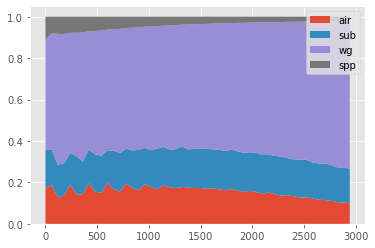

In [61]:
spectrally_integrated_modes = arch.analyze_modes_loop(d_EML_list,loop_data)
with plt.style.context('ggplot'):
    plt.stackplot(d_EML_list,spectrally_integrated_modes.T,
                 labels=spectrally_integrated_modes.columns,alpha=1)
    plt.legend()

In [62]:
with open('mode distribution.txt','w') as f: 
    #numpy.set_printoptions(threshold=numpy.nan)
    #np.set_printoptions(threshold=np.inf)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)  #To prevent omission of data
    print(spectrally_integrated_modes, file=f)

    # print (d_EML_list) #debugging

In [34]:
outcoupling_array=['']*len(d_EML_list)
eta_out = np.zeros(len(d_EML_list))
PLQYeff = np.zeros(len(d_EML_list))
U = np.zeros(len(d_EML_list))
F = np.zeros(len(d_EML_list))
U_over_F = np.zeros(len(d_EML_list))
for d_idx,d_EML in enumerate(d_EML_list):
    K_total_array = loop_data['K_total_loop'][d_idx]
    K_out_array = loop_data['K_out_loop'][d_idx]
    outcoupling_array[d_idx]= arch.calc_outcoupled_fraction_array(
        K_total_array,K_out_array)
    arch.outcoupling_array = outcoupling_array[d_idx]
    lam_avg_eta_out,space_avg_eta_out = arch.spatially_average_outcoupling(return_values=True)
    eta_out[d_idx] = lam_avg_eta_out
    arch.K_total_array=K_total_array
    arch.K_out_array=K_out_array
    arch.purcell_factor(tau=1e-6,PLQY=0.85)
    PLQYeff[d_idx] = arch.PLQY_effective_avg
    U[d_idx]=arch.U_avg
    F[d_idx]=arch.F_avg

In [109]:
print(spectrally_integrated_modes)

        air       sub        wg       spp
0  0.107806  0.143728  0.747783  0.000682


In [5]:
d_EML_list=np.arange(0,600,60)
loop_data = arch.loop_over_single_layer_prop(
     layer_idx=4,layer_prop_list=d_EML_list,layer_prop='d')

Varied layer is: TPBi


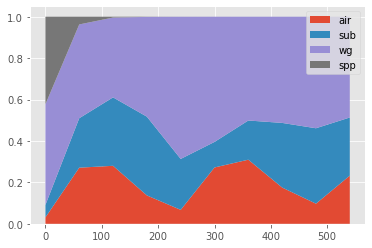

In [6]:
spectrally_integrated_modes = arch.analyze_modes_loop(d_EML_list,loop_data)
with plt.style.context('ggplot'):
    plt.stackplot(d_EML_list,spectrally_integrated_modes.T,
                 labels=spectrally_integrated_modes.columns,alpha=1)
    plt.legend()

In [62]:
with open('mode distribution.txt','w') as f: 
    pd.set_option('display.max_columns', None)  #To prevent omission of data
    print(spectrally_integrated_modes, file=f)

    print (d_EML_list) #debugging

[   0   60  120  180  240  300  360  420  480  540  600  660  720  780
  840  900  960 1020 1080 1140 1200 1260 1320 1380 1440 1500 1560 1620
 1680 1740 1800 1860 1920 1980 2040 2100 2160 2220 2280 2340 2400 2460
 2520 2580 2640 2700 2760 2820 2880 2940 3000]


In [ ]:
layer_names = ['Air','SiO2','MAPbI3','SiO2','Air']
d = [100,100,100,100,100]
doping = [1,1,1,1,1]
active_layer = 2
# Define wavelengths of interest
arch = ThinFilmArchitecture(
    d=d,layer_names=layer_names,doping=doping,active_layer=active_layer,
    dipole_positions=[0.5],u_step=0.00025,u_stop=2,
    tau=1e-6,PLQY=0.85,
    vac_wavelengths=np.arange(750,790,10))#
arch.load_nk(df_nk=df_nk)
arch.init_pds_variables()

In [432]:
arch.show_wavelength_progress_bar=True
layer_idx=2
d_EML_list=np.arange(10,4000,50)
loop_data = arch.loop_over_single_layer_prop(
     layer_idx=2,layer_prop_list=d_EML_list,layer_prop='d')

Varied layer is: MAPbI3


In [433]:
ptint()

ValueError: setting an array element with a sequence.

In [312]:
layer_names = ['SiO2','ITO','polyTPD','MAPbI3','TPBi','Al','Air']
d = [0,100,35,30,40,100,0]
doping = [1,1,1,1,1,1,1]

In [313]:
wavelengths = np.arange(480,670,5)# Define wavelengths of interest
dipole_positions = [0.9] # dipole planes located near EML/ETL interface
MAPbI3_PL = np.genfromtxt(os.path.join("Reference Data",'MAPbI3_intrinsic_pl.csv'),skip_header=1,delimiter=',')
PL_interp = np.interp(wavelengths,MAPbI3_PL[:,0],MAPbI3_PL[:,1])
architecture = ThinFilmArchitecture(
    #layer_dict_list = layers,
    dipole_positions = dipole_positions,
    tau=1e-6,PLQY=0.95, # Intrinsic exciton lifetime and PL quantum yield of Ir(ppy)3
    vac_wavelengths=wavelengths,pl_spectrum=PL_interp)
architecture.load_nk(df_nk=df_nk)
architecture.run_attribute_checks()

Doping was not defined. Assuming no doped layers
Layer names not yet set.
RZ not provided. Flat RZ will be assumed


In [299]:
from oledpy.dipole_emission import emission_polar_plot
with plt.style.context(('ggplot')):
    intensity,radiance,luminance = arch.calc_angular_emission_profile()
    fig,ax,handle,lambertian_handle = emission_polar_plot(
        arch.thetas,intensity,leg_label='Simulated',theta_range=[0,90],theta_grid_step=15)
    leg=ax.legend(bbox_to_anchor=(1.3,1.2))
    ax.set_ylim(-0.05,1.05)
    ax.grid(color=0.7*np.ones((3,)),linewidth=0.5)
    [ax.spines[i].set_linewidth(0.8) for i in ax.spines] #adjust border width
    plt.savefig('test_polar.png',dpi=300,bbox_inches='tight',bbox_extra_artists=[leg],
               transparent=True)
    plt.show()

AttributeError: 'ThinFilmArchitecture' object has no attribute 'I_EL'

Flat RZ:
n_OC = 4.3%
Exponential RZ, HTL side:
n_OC = 4.3%
Exponential RZ, ETL side:
n_OC = 4.3%


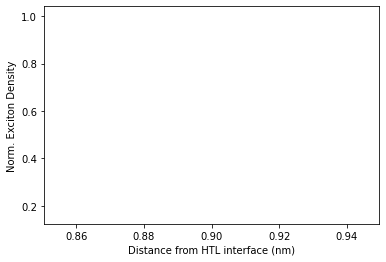

In [300]:
# Compare outcoupling efficiency for different RZ shapes
arch2.set_RZ(np.ones(arch2.dipole_positions.shape))
# Or manually:
# arch2.RZ = np.ones(arch2.dipole_positions.shape)
# arch2.RZ_weights = arch2.RZ / np.trapz(arch2.RZ,arch2.dipole_positions)
arch2.spatially_average_outcoupling()
print("Flat RZ:")
print('n_OC = ' +
      '{:.1f}'.format(arch2.spatially_averaged_eta_out*100)+'%')
plt.plot(arch2.dipole_positions,arch2.RZ)

arch2.set_RZ(np.ones(arch2.dipole_positions.shape)
                    * np.exp(-arch2.dipole_positions/0.5))
# arch2.RZ = (np.ones(arch2.dipole_positions.shape)
#                     * np.exp(-arch2.dipole_positions/0.5))
# arch2.RZ_weights = arch2.RZ / np.trapz(arch2.RZ,arch2.dipole_positions)

arch2.spatially_average_outcoupling()
print("Exponential RZ, HTL side:")
print('n_OC = ' +
      '{:.1f}'.format(arch2.spatially_averaged_eta_out*100)+'%')
plt.plot(arch2.dipole_positions,arch2.RZ)

arch2.set_RZ(np.ones(arch2.dipole_positions.shape)
                    * np.exp(-(1-arch2.dipole_positions)/0.5))
# arch2.RZ = (np.ones(arch2.dipole_positions.shape)
#                     * np.exp(-(1-arch2.dipole_positions)/0.5))
# arch2.RZ_weights = arch2.RZ / np.trapz(arch2.RZ,arch2.dipole_positions)

arch2.spatially_average_outcoupling()
print("Exponential RZ, ETL side:")
print('n_OC = ' +
      '{:.1f}'.format(arch2.spatially_averaged_eta_out*100)+'%')
plt.plot(arch2.dipole_positions,arch2.RZ)
plt.xlabel("Distance from HTL interface (nm)")
plt.ylabel("Norm. Exciton Density")
plt.show()

In [6]:
layer_names = ['SiO2','ITO','polyTPD','MAPbI3',
               'TPBi','Al','Air']
d = [0,150,25,10,40,100,0]
doping = [1,1,1,1,1,1,1]
active_layer = 3
# Define wavelengths of interest
arch = ThinFilmArchitecture(
    d=d,layer_names=layer_names,doping=doping,active_layer=active_layer,
    dipole_positions=[0.94],u_step=0.00025,u_stop=2,
    tau=1e-6,PLQY=0.85,
    vac_wavelengths=np.arange(750,790,10))#
arch.load_nk(df_nk=df_nk)
arch.init_pds_variables()

Active layer is: MAPbI3. 
 To change, call arch.set_active_layer(active_layer) Indexing starts at 0.
RZ not provided. Flat RZ will be assumed
No PL spectrum provided. Flat (white) emission will be assumed
Provided imaginary active layer index. Discarding imaginary part.


In [11]:
arch.set_dipole_positions(np.arange(0,1,0.2)) 

Dipole positions changed. Remember to update RZ
RZ and dipole_positions not same length! Flat RZ will be assumed


In [13]:
loop_data = arch.loop_over_single_layer_prop(
     layer_idx=3,layer_prop_list=dipole_positions,layer_prop='d')

NameError: name 'dipole_positions' is not defined

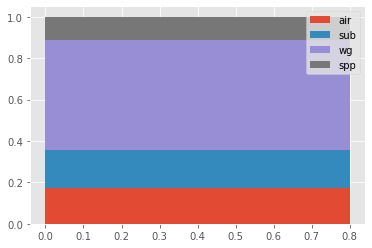

In [48]:
spectrally_integrated_modes = arch.analyze_modes_loop(set_dipole_positions,loop_data)
with plt.style.context('ggplot'):
    plt.stackplot(set_dipole_positions,spectrally_integrated_modes.T,
                 labels=spectrally_integrated_modes.columns,alpha=1)
    plt.legend()

In [17]:
d_EML_list=np.arange(0,600,60)
loop_data = arch.loop_over_single_layer_prop(
     layer_idx=3,layer_prop_list=d_EML_list,layer_prop='d')

In [18]:
layers = [
     {'name':'SiO2'      ,'d':0  ,'doping':1,'coherent':0},
     {'name':'ITO'       ,'d':100,'doping':1,'coherent':1},
     {'name':'TCTA'      ,'d':35 ,'doping':1,'coherent':1},
     {'name':'CBP-Irppy','d':30 ,'doping':[0.92,0.08],'coherent':1,'active':1},
     {'name':'TPBi'      ,'d':40 ,'doping':1,'coherent':1},
     {'name':'Al'        ,'d':100,'doping':1,'coherent':1},
     {'name':'Air'       ,'d':0  ,'doping':1,'coherent':0},
]

In [19]:
wavelengths = np.arange(480,670,5)# Define wavelengths of interest
dipole_positions = [0.9] # dipole planes located near EML/ETL interface
irppy3_PL = np.genfromtxt(os.path.join("Reference Data",'irppy3_intrinsic_pl.csv'),skip_header=1,delimiter=',')
PL_interp = np.interp(wavelengths,irppy3_PL[:,0],irppy3_PL[:,1])
architecture = ThinFilmArchitecture(
    layer_dict_list = layers,
    dipole_positions = dipole_positions,
    tau=1e-6,PLQY=0.94, # Intrinsic exciton lifetime and PL quantum yield of Ir(ppy)3
    vac_wavelengths=wavelengths,pl_spectrum=PL_interp)
architecture.load_nk(df_nk=df_nk)
architecture.run_attribute_checks()

Active layer is: CBP-Irppy. 
 To change, call arch.set_active_layer(active_layer) Indexing starts at 0.
RZ not provided. Flat RZ will be assumed
